<a href="https://colab.research.google.com/github/anjanapjayapal/Stock-market-analysis-and-prediction/blob/main/Stock_price_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. DATA EXPLORATION & PREPROCESSING**


In [ ]:
!pip install yfinance # Python library to access historical market data from Yahoo Finance

1.1 DOWNLOADING DATA

The stock data for Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN) was collected using the yfinance library. This data included information such as the opening price, closing price, high, low, adjusted closing price, and trading volume. The time range for data collection was set to the previous year from the current date.

In [ ]:
import yfinance as yf
from datetime import datetime

# Set start and end dates for the data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data for AAPL, GOOG, MSFT, AMZN
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1.2 CONCATENATION OF DATA

To handle data from multiple companies efficiently, the individual stock data for each company was concatenated into a single DataFrame. A new column, company_name, was added to differentiate between the stocks.

In [ ]:
# Combine stock data into a single DataFrame
import pandas as pd
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
print(df.shape)
print(df.head(500))

(1004, 7)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-23  170.910004  174.009995  169.929993  173.000000  172.119263   
2023-10-24  173.050003  173.669998  171.449997  173.440002  172.557007   
2023-10-25  171.880005  173.059998  170.649994  171.100006  170.228928   
2023-10-26  170.369995  171.380005  165.669998  166.889999  166.040344   
2023-10-27  166.910004  168.960007  166.830002  168.220001  167.363571   
...                ...         ...         ...         ...         ...   
2024-10-11  163.330002  165.270004  162.500000  164.520004  164.520004   
2024-10-14  164.910004  167.619995  164.779999  166.350006  166.350006   
2024-10-15  167.139999  169.089996  166.050003  166.899994  166.899994   
2024-10-16  166.029999  167.279999  165.216003  166.740005  166.740005   
2024-10-17  167.380005  167.929993  164.369995  164.509995  164.509995   

              Volume compan

**DATA PREPROCESSING**

1.3 Handling Missing Values

The stock market data may contain missing values due to holidays or non-trading days. Missing values were handled by forward-filling, which is appropriate in this case as stock prices are time-sequential, and missing values can be inferred from previous days.

In [ ]:
df.isnull().sum() # To check if there are any missing values in the data

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
company_name,0


There are no missing values.

In [ ]:
# Forward-fill any missing values in the data
df.ffill(inplace=True)
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
company_name,0


1.4 Removing duplicates

In [ ]:
df.duplicated().sum() # To check if there are any duplicate values


0

In [ ]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

1.5 Normalization and Scaling

Since the LSTM model is sensitive to large variations in input data, it was necessary to scale the stock prices before feeding them into the model. The MinMaxScaler from sklearn.preprocessing was used to scale the data between 0 and 1, a common practice for time-series prediction tasks.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Prepare the close price data for scaling
data = df.filter(['Close'])
dataset = data.values

# Scale data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


- Scaling only the 'Close' price ensures the model focuses on predicting the target variable (future stock prices) without altering the inherent relationships in other features like volume or moving averages.
- Scaling all features could distort their relative importance or patterns, whereas scaling only the target feature maintains its interpretability and ensures the model's focus remains on stock price prediction.


**2. EXPLORATORY DATA ANALYSIS (EDA)**

2.1 Descriptive Statistics and Data Summary

In [ ]:
AAPL.describe() # Summary statistics for AAPL stock

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,197.263346,199.042709,195.579004,197.432550,197.037267,5.867292e+07
std,21.093005,21.302545,20.692255,21.053577,21.246716,3.017316e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,182.040001,183.080002,180.360001,182.110001,181.367722,4.344015e+07
50%,191.410004,192.570007,189.910004,191.449997,190.835846,5.228010e+07
75%,219.079994,221.514999,216.875000,219.985001,219.810570,6.515995e+07
max,236.479996,237.490005,234.449997,236.479996,236.479996,3.186799e+08


In [ ]:
AAPL.info() # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-10-23 to 2024-10-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
AAPL.dtypes  # Data types for columns

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64
company_name,object


2.2 Plotting Closing Prices

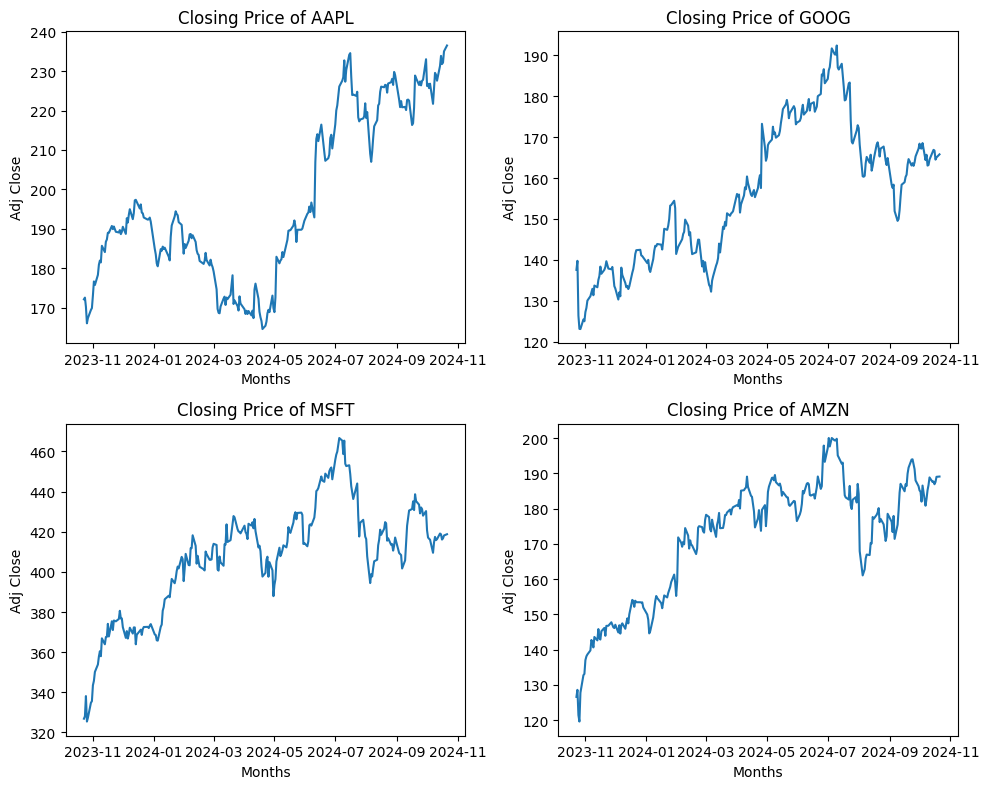

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['Adj Close'])
    plt.ylabel('Adj Close')
    plt.xlabel('Months')
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

2.3 Plotting Volume of Sales


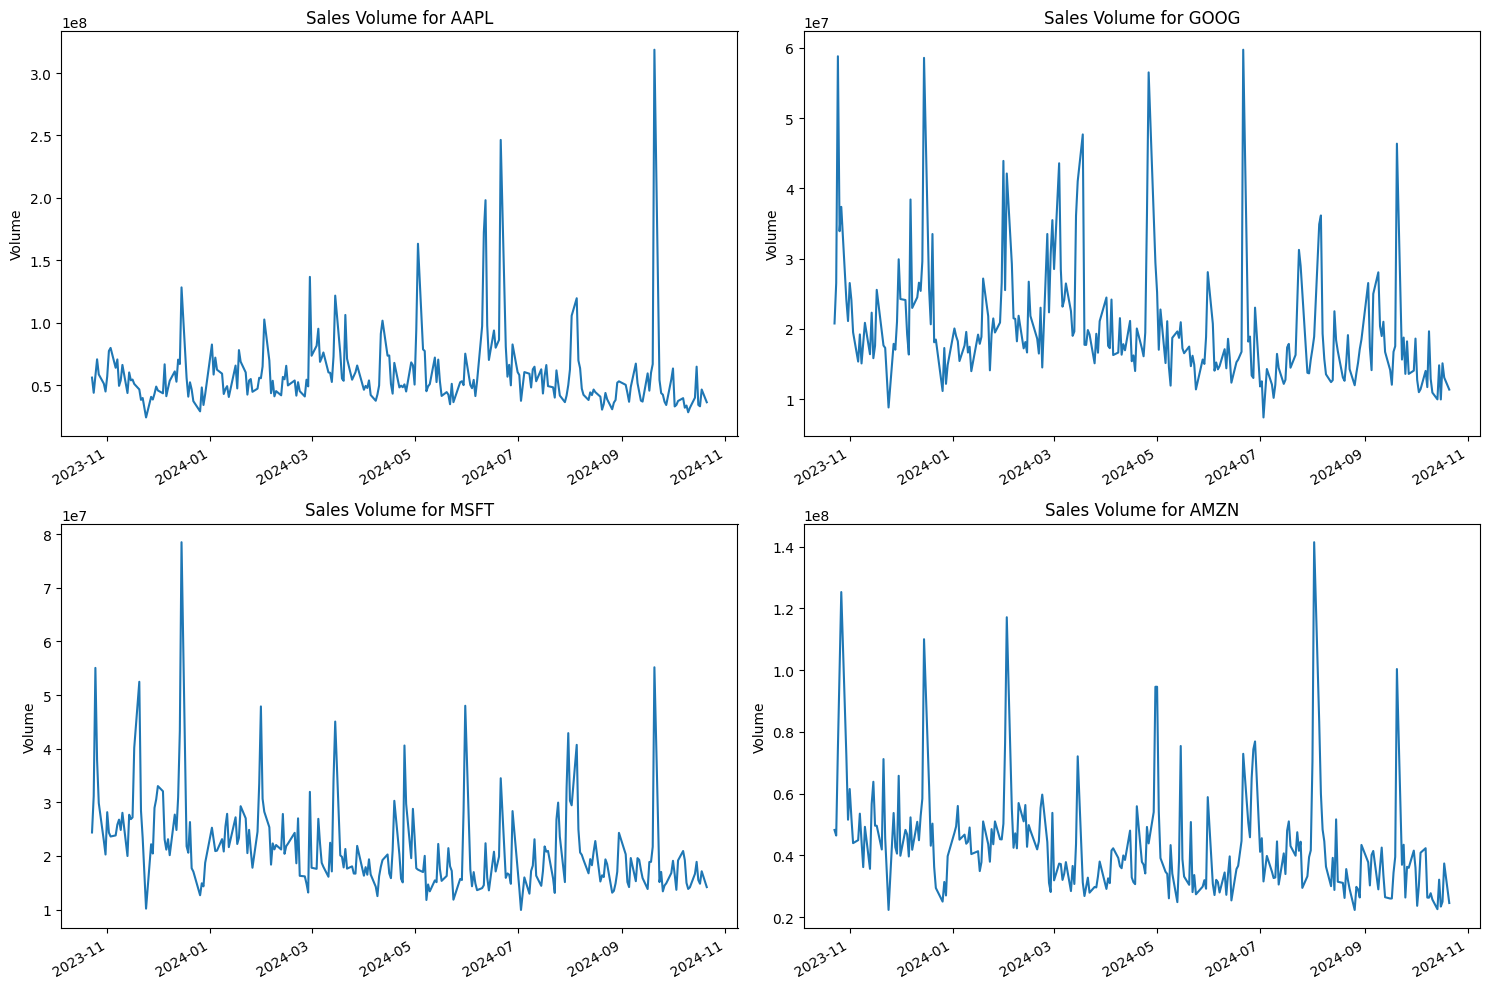

In [ ]:
# Plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

2.4 FEATURE ENGINEERING

Several features were created to aid in the analysis and modeling of stock prices:

Moving Averages: To capture trends, moving averages for 10, 20, and 50 days were calculated and added as new columns.

Daily Return: The percentage change in closing prices from day to day was calculated to gauge stock volatility and trends.

In [ ]:
# Create moving averages and daily return
# 10-day MA: A short-term trend indicator.
# 20-day MA: A medium-term trend indicator.
# 50-day MA: A long-term trend indicator, showing the overall direction of the stock.


# Calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        company[f"MA for {ma} days"] = company['Adj Close'].rolling(ma).mean()

# Calculate daily returns
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Concatenate the updated DataFrames into one
df = pd.concat(company_list, axis=0)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,AMAZON,185.262000,187.574001,180.294200,0.000800
2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,AMAZON,185.475000,187.597001,180.793401,-0.004262
2024-10-17,188.220001,188.940002,186.000000,187.529999,187.529999,25039400,AMAZON,186.031999,187.480001,181.288600,0.003424
2024-10-18,187.149994,190.740005,186.279999,188.990005,188.990005,37417700,AMAZON,186.280000,187.349501,181.752401,0.007785
2024-10-21,188.050003,189.460007,186.399994,189.070007,189.070007,24612200,AMAZON,187.107001,187.109001,182.195001,0.000423



- Moving Averages (MAs) are a popular statistical tool used in time-series analysis, particularly in financial markets, to smooth out short-term fluctuations and highlight longer-term trends or cycles. By averaging the data points of a stock price over a specific time period, MAs provide insight into the general direction the stock is moving.

Formula for SMA:

𝑆
𝑀
𝐴
=
(𝑃
1
+
𝑃
2
+
.
.
.
+
𝑃
𝑛)
/ n
​

**Moving Average Crossovers:
When a short-term MA (e.g., 10-day) crosses above a long-term MA (e.g., 50-day), it indicates a bullish signal (buy). Conversely, when it crosses below, it's a bearish signal (sell).

- Daily returns represent the percentage change in the stock's adjusted closing price from one trading day to the next. This calculation helps in understanding the short-term performance of the stock and its volatility. The formula for daily return is:

$
\text{Daily Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}}
$




2.4.1 Plotting Moving Averages

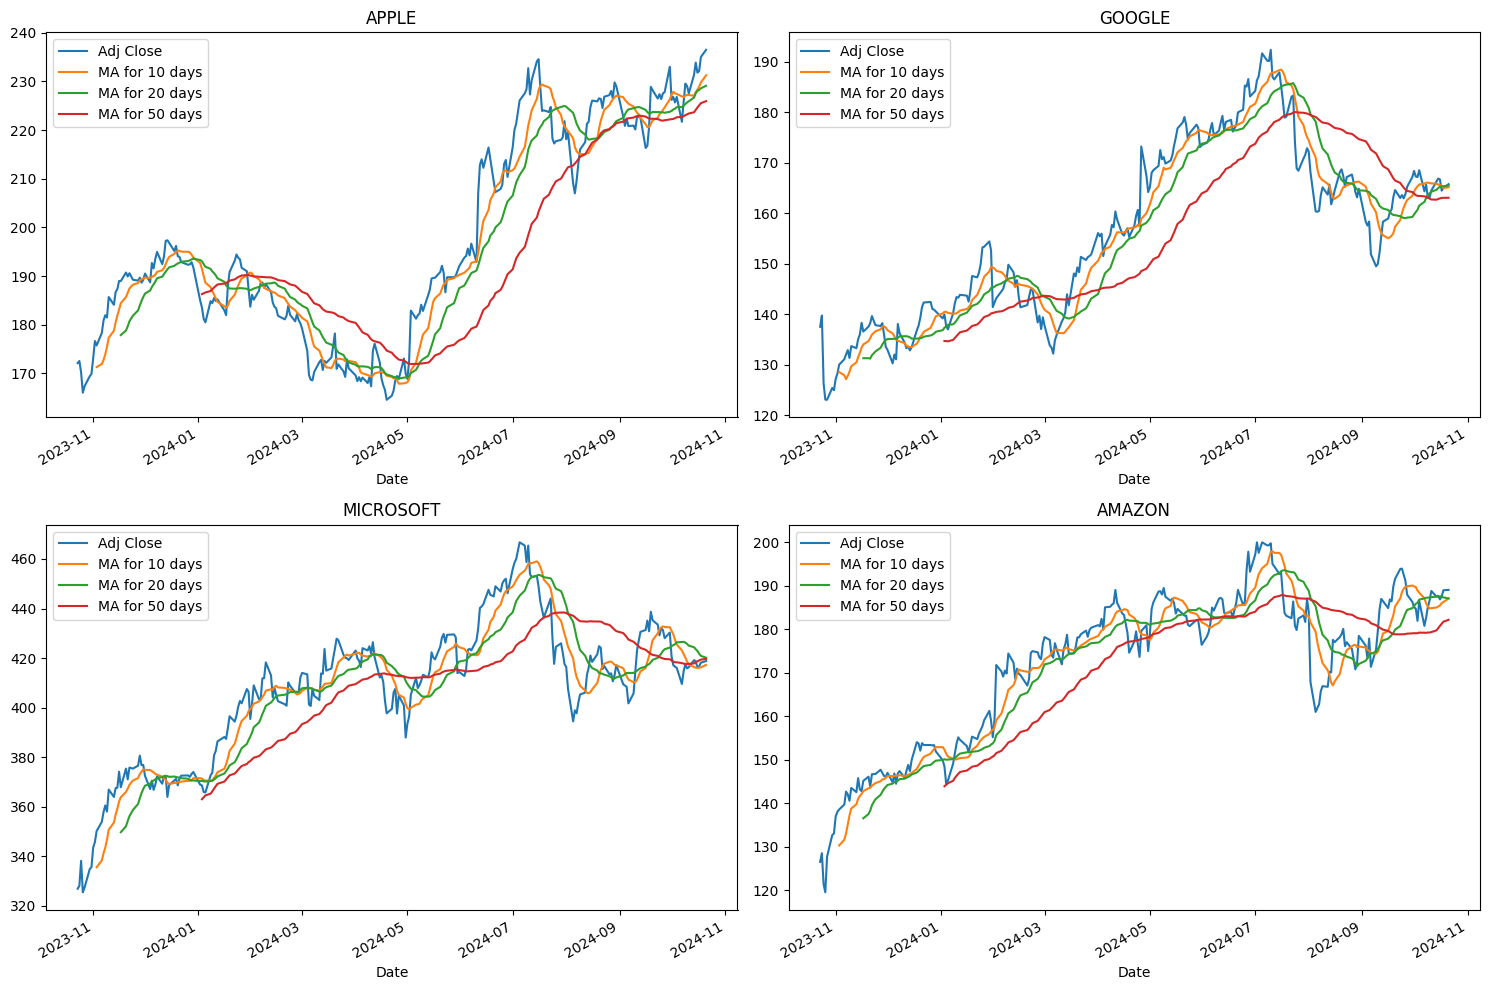

In [ ]:
# Plot the moving averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()



The graph displays the adjusted closing prices and moving averages (10-day, 20-day, and 50-day) for Apple, Google, Microsoft, and Amazon. The blue line represents the adjusted closing prices, showing the stock's overall trend, while the orange, green, and red lines represent the 10-day, 20-day, and 50-day moving averages respectively, smoothing out the price fluctuations to show short, intermediate, and long-term trends. Apple, Google, and Microsoft exhibit upward momentum until mid-2024, followed by a correction, while Amazon's performance also peaks around the same period. The 10-day and 20-day moving averages closely follow the stock's price movement, reacting to short-term fluctuations, while the 50-day moving average shows a slower, more stable long-term trend.


2.4.2 Plotting Daily Returns

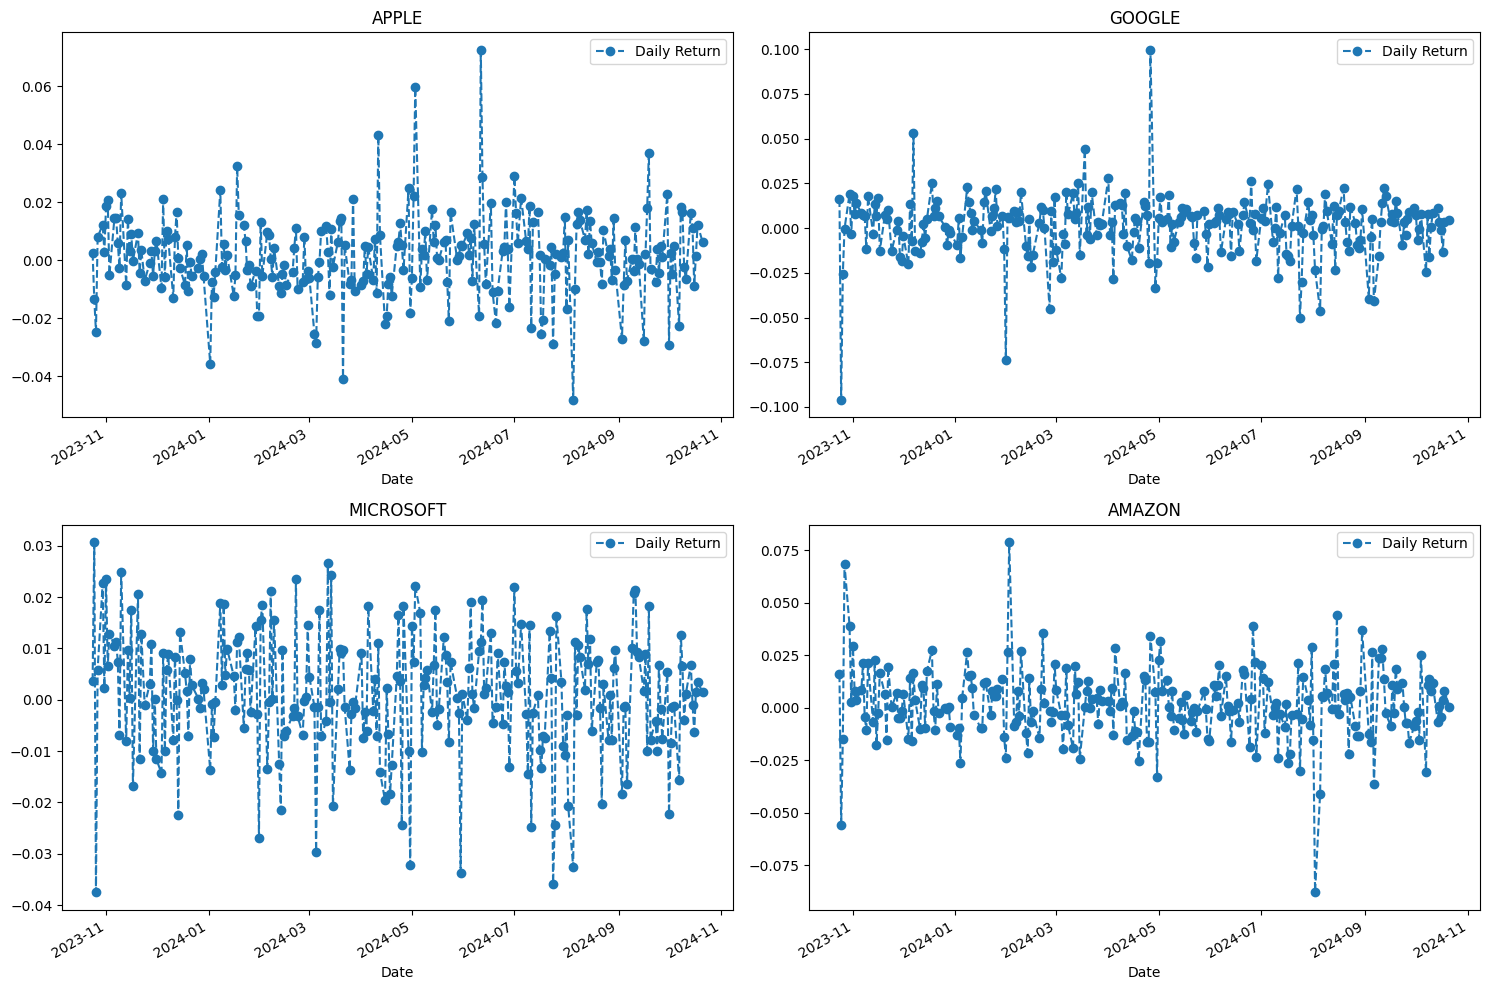

In [ ]:
# Plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()



$
\text{Daily Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}}
$

Where:
- $\text{Price}_t$ is the closing price on day \(t\).
- $\text{Price}_{t-1}$ is the closing price on day \(t-1\).

### **Example:**
If a stock closes at 150 on day 1 and 155 on day 2, the daily return is:

$
\frac{155 - 150}{150} = 0.0333 \, (3.33\%)
$

- **Positive return**: Stock price increased.
- **Negative return**: Stock price decreased.
- **Volatility**: Magnitude of fluctuations in daily returns shows risk.


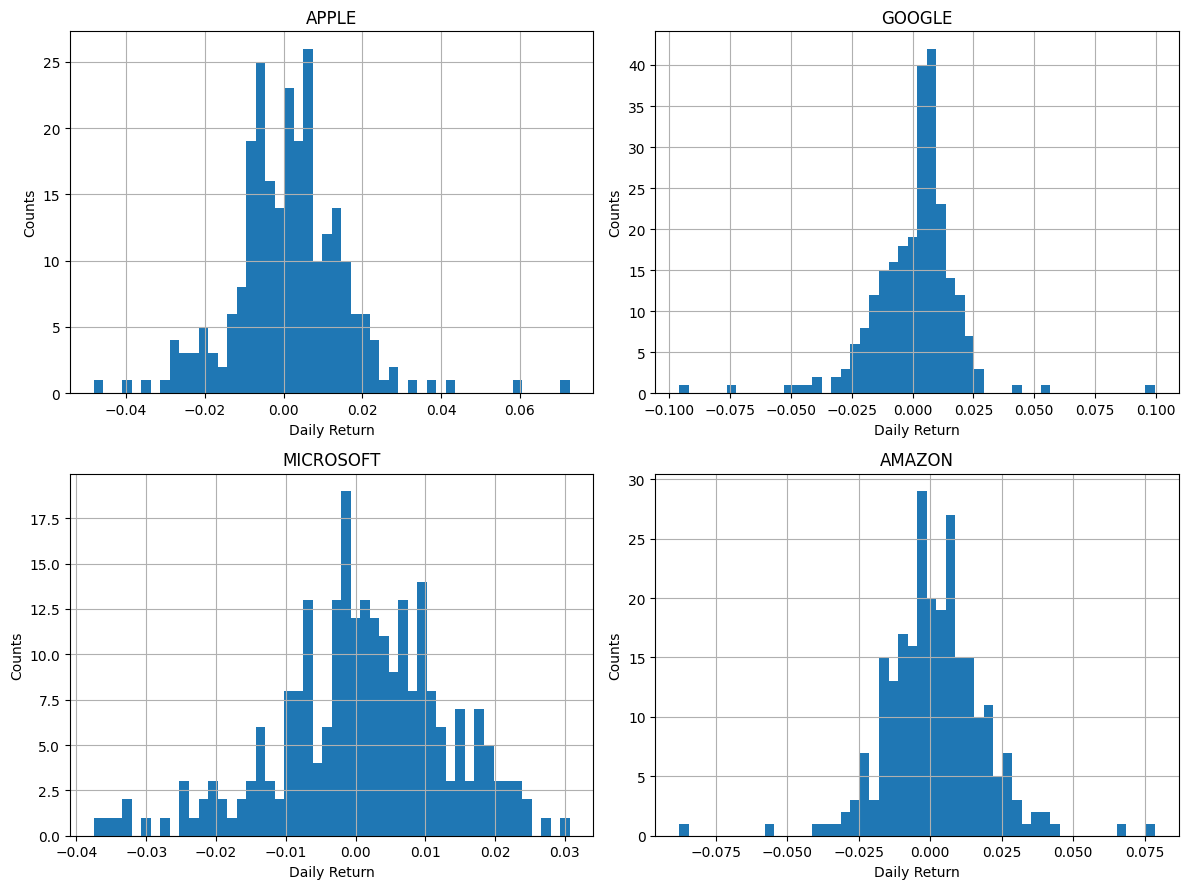

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

The histograms show the daily return distributions for Apple, Google, Microsoft, and Amazon, with most returns concentrated around zero, demonstrating the typical bell-curve shape of a normal distribution. The distribution for Apple and Microsoft appears relatively symmetric, indicating balanced positive and negative returns, while Google and Amazon show more left skew, reflecting more frequent negative returns. The general form of a normal distribution is described by the equation:

  $
  f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
  $

where $ \mu $ is the mean (center of the distribution), $ \sigma^2 $ is the variance (spread of the distribution), and $ x $ represents the daily return. The histograms visually approximate the shape of this normal distribution for each company.


2.5 Correlation Analysis

In [ ]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-23 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-10-24 00:00:00+00:00,0.002543,0.015803,0.016099,0.003674
2023-10-25 00:00:00+00:00,-0.013492,-0.055772,-0.095989,0.030678
2023-10-26 00:00:00+00:00,-0.024605,-0.014993,-0.025499,-0.037514
2023-10-27 00:00:00+00:00,0.007969,0.068328,-0.000324,0.005856


Now we retrieve the adjusted closing prices for the companies in tech_list (Apple, Google, Microsoft, and Amazon) from Yahoo Finance between the specified start and end dates. Then, we calculate the daily percentage returns for each company and displays the first few rows of the resulting DataFrame.

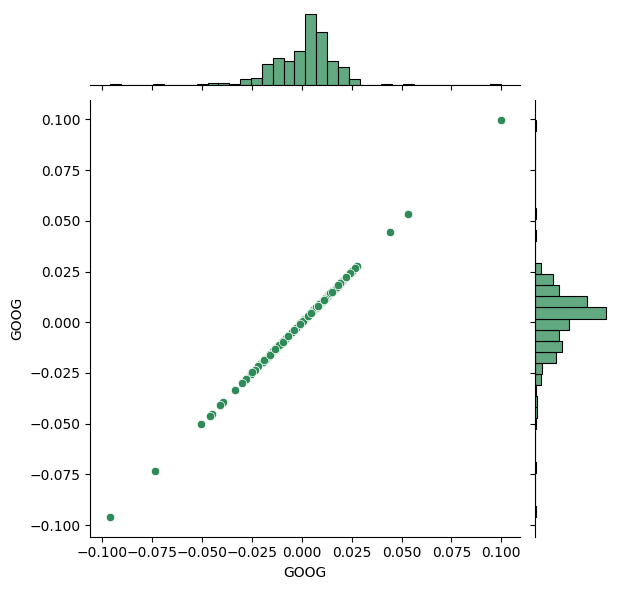

In [ ]:
import seaborn as sns
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

The graph shows a joint plot for the stock returns of Google (GOOG). The plot includes:

- A **scatter plot** in the center showing the daily returns of GOOG on both the x and y axes. The points are tightly aligned along the diagonal, suggesting that the same data is plotted on both axes (GOOG vs. GOOG).
- **Histograms** on both the x and y axes that illustrate the distribution of daily returns. These histograms show a roughly normal distribution, with the majority of the data clustered around zero and fewer extreme values on either side.

This type of plot is useful for analyzing the distribution and relationships of returns for a specific stock. In this case, it highlights the symmetry and distribution of Google’s daily returns.


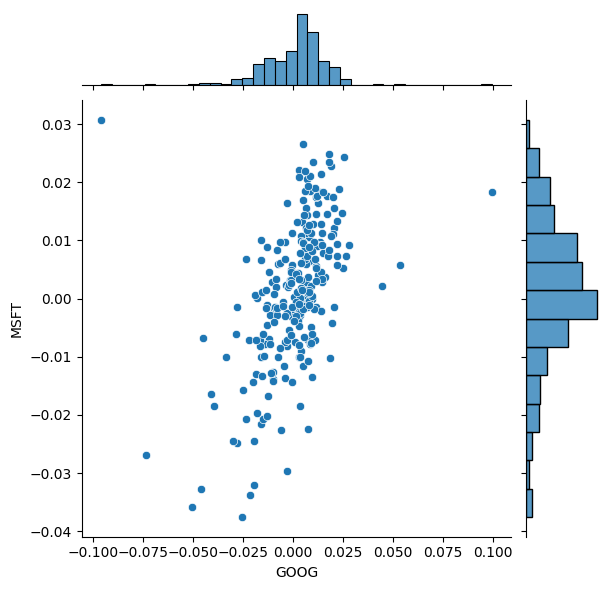

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')



*   This code snippet uses the Seaborn library to create a joint plot that visualizes the relationship between the daily returns of Google (GOOG) and Microsoft (MSFT) using a scatter plot. It displays the daily returns of Google on the x-axis and those of Microsoft on the y-axis, facilitating an examination of the correlation between the two stocks' performance. This visualization helps in identifying any patterns or relationships in the daily returns of both companies, providing insights into how their returns may be related to one another.



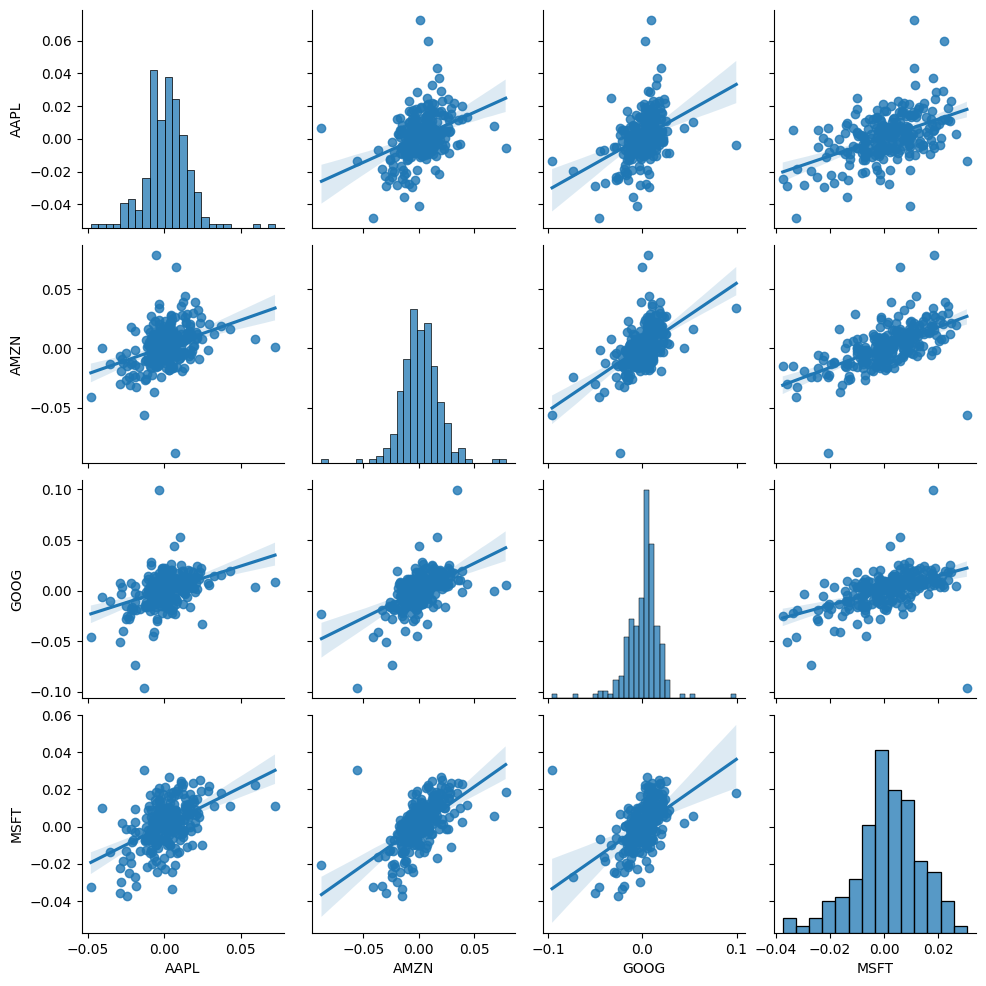

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')



* This code snippet utilizes the Seaborn library to create a comprehensive PairGrid visualization for analyzing the daily returns of the technology stocks in the dataset. It first sets up a figure named returns_fig by creating a PairGrid from the DataFrame of daily returns, excluding any missing values. The upper triangle of the grid is populated with scatter plots, visualized in purple, to illustrate the relationships between different pairs of stocks. The lower triangle features kernel density estimate (KDE) plots, which use the 'cool_d' color map to provide a smooth representation of the distribution of daily returns. Lastly, the diagonal of the grid displays histograms of the daily returns, with 30 bins to show the frequency distribution for each stock. This multi-faceted visualization facilitates a thorough exploration of the relationships and distributions of daily returns among the selected technology stocks.



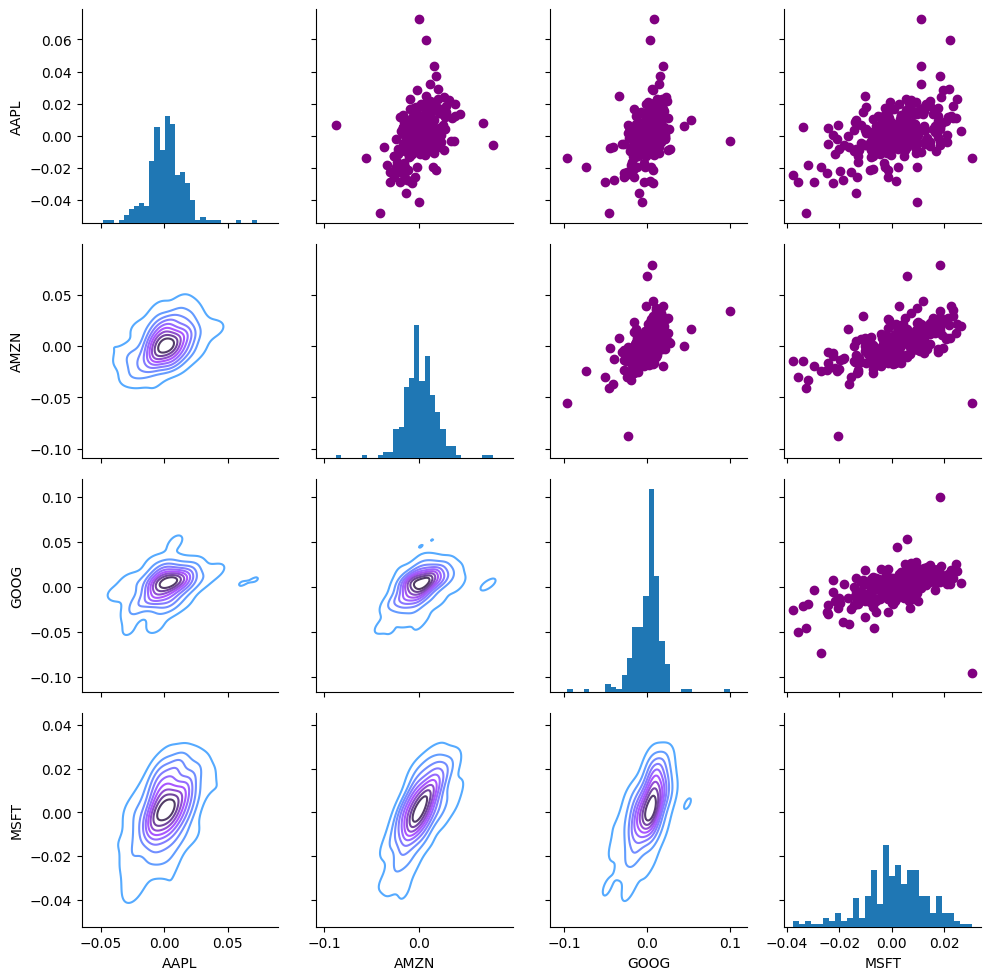

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

The image is a detailed pair plot visualizing the daily returns of four tech stocks: AAPL (Apple), AMZN (Amazon), GOOG (Google), and MSFT (Microsoft). The diagonal plots represent histograms of the daily returns for each stock, showing the distribution. The upper triangular plots consist of scatter plots with purple points, depicting the relationship between the stocks' returns. The lower triangular plots are contour plots based on Kernel Density Estimation (KDE), showing the probability density contours of the stocks' returns in a smooth, continuous form. This combination of visualizations offers insights into both individual and comparative return distributions for the stocks.

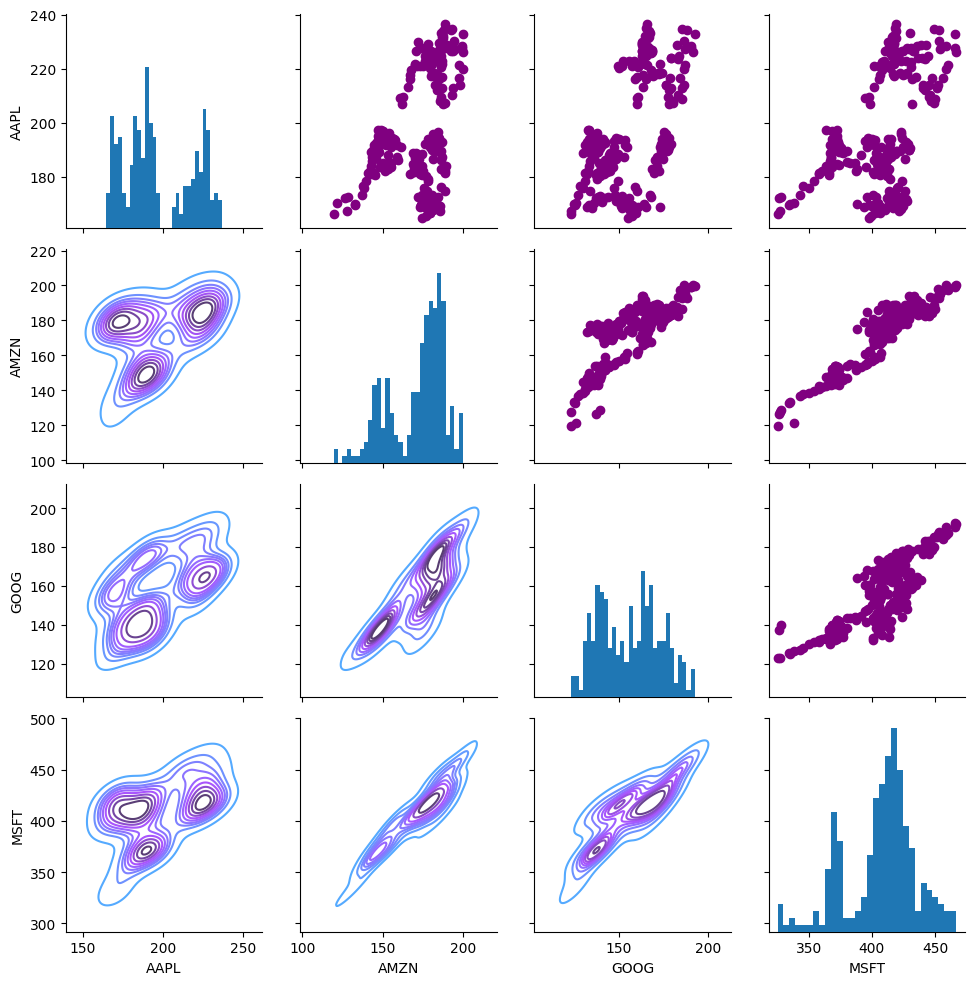

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

This pair plot visualizes the stock price relationships and distributions for four major tech companies: Apple (AAPL), Amazon (AMZN), Google (GOOG), and Microsoft (MSFT). The upper triangle features scatter plots showing pairwise relationships between the companies' stock prices, using purple markers to highlight correlations. The lower triangle displays Kernel Density Estimate (KDE) plots with smooth, blue-purple contours, illustrating the density and distribution of stock prices for each pair. Along the diagonal, histograms show the frequency distribution of each company's stock prices, providing insight into their individual price behaviors. This matrix offers a comprehensive view of stock price interactions and trends across the selected companies.








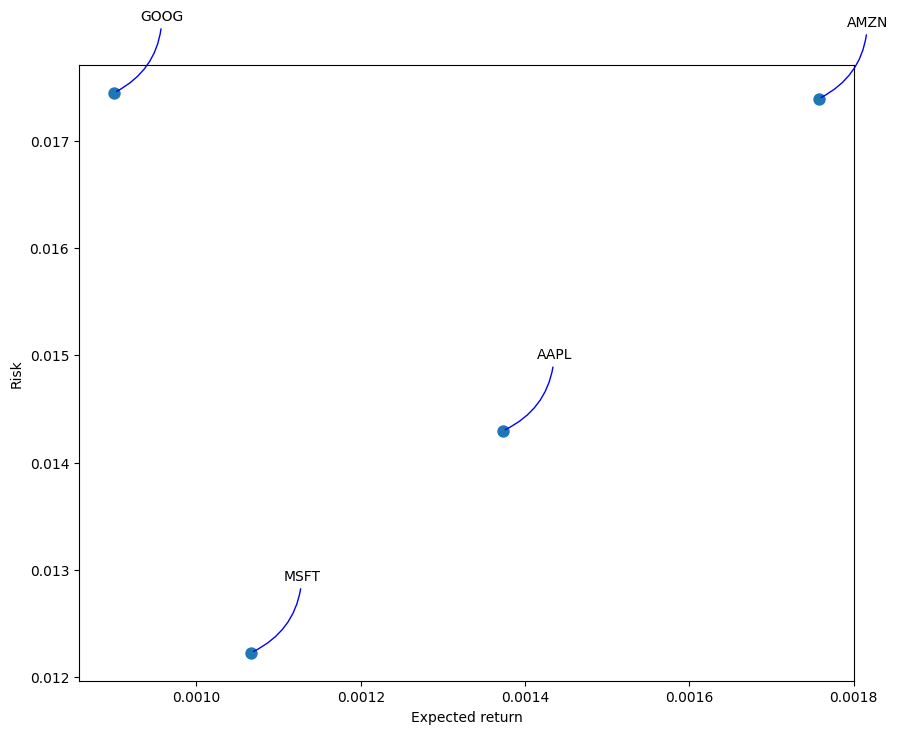

In [ ]:
import numpy as np
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

This chart visualizes the expected return and risk (standard deviation) of four major tech stocks: Google (GOOG), Amazon (AMZN), Apple (AAPL), and Microsoft (MSFT). The x-axis represents the expected return, while the y-axis represents the risk. Each stock is represented by a point, with its position reflecting the balance between risk and return. Blue curved arrows point to the individual stocks, and the scatter points are scaled to enhance visibility. AMZN and GOOG appear to have higher returns but also higher risk, while MSFT and AAPL are situated lower on both scales, indicating relatively lower risk and return. This plot is useful for comparing the risk-reward profiles of these stocks.

Text(0.5, 1.0, 'Correlation of stock closing price')

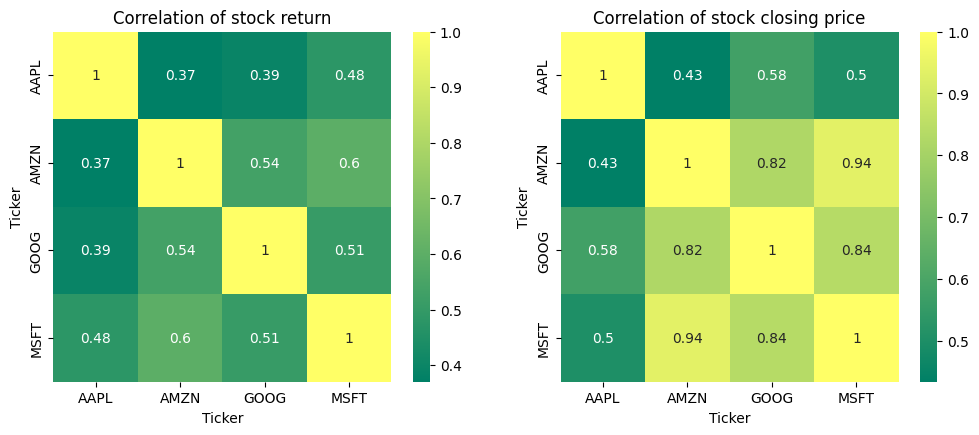

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Correlation insights from the heatmaps:

1. Stock Return Correlation:

- The heatmap for stock returns shows the correlation between the percentage changes in closing prices of different stocks.
- High positive correlation (close to 1) indicates that when one stock's return increases, the other stock's return is likely to increase as well. This suggests they move together in the market.
- High negative correlation (close to -1) indicates that when one stock's return increases, the other stock's return is likely to decrease. This suggests an inverse relationship between their movements.
- Correlation close to 0 suggests no strong linear relationship between the stocks.

2. Stock Closing Price Correlation:

- The heatmap for closing prices shows the correlation between the actual closing prices of different stocks.
- High positive correlation indicates a tendency for both stocks to move in the same direction in terms of their price levels.
- High negative correlation indicates a tendency for stocks to move in opposite directions in terms of their price levels.
- Correlation close to 0 suggests no strong linear relationship between the stock closing prices.




** Generally, there is a positive correlation among the closing prices of GOOG, MSFT, and AMZN. This is expected as these are large, well-established technology companies, and their stock prices tend to move together.

** The correlation between returns can be a bit different, as the returns can be affected by various factors like news, sector performance, and company-specific events.

** By analyzing the correlation matrix, we can understand the relationship between different stocks. We can identify stocks that tend to move together or stocks that exhibit opposing behavior. This information can be helpful for portfolio diversification and risk management.


[This Data Preprocessing and EDA stage ensures that the stock price data is clean, consistent, and suitable for use in machine learning models, particularly for time-series forecasting using LSTMs.]

**3. MODEL BUILDING**

3.1 Train-Test Split

To build a reliable LSTM model, the dataset was split into training and testing sets. 95% of the data was used for training the model, while the remaining 5% was reserved for testing and evaluation.

In [ ]:
import numpy as np

# Split the data into training and testing sets
training_data_len = int(np.ceil(len(dataset) * .95))

# Create the training dataset
train_data = scaled_data[0:training_data_len]


3.2 Sequence Creation for LSTM Model
- In the context of stock price prediction, sequence creation refers to structuring the data into fixed-length sequences where each sequence consists of a specific number of past observations (time steps) used to predict a future value.

- Since LSTMs are designed to work with sequential data, the training set was further transformed into sequences of 60 time steps. Each sequence consisted of the stock prices for the previous 60 days, which were used to predict the stock price on the 61st day.

In [ ]:
# Create sequences for training the LSTM model
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays and reshape for LSTM input
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

3.3 Build the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3.4 Testing and Evaluation

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.5 Visualize the Results

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid